# Procesamiento de Lenguaje Natural (PLN)

## Tareas Clásicas en PLN

Creado por *Ricardo Kleinlein* para [Saturdays.AI](https://saturdays.ai/).

Disponible bajo una licencia [Creative Commons](https://creativecommons.org/licenses/by/4.0/).

---

## Sobre el uso de Jupyter Notebooks

Este notebook ha sido implementado en Python, pero para su ejecución no es
necesario conocer el lenguaje en profundidad. Solamente se debe ejecutar cada
una de las celdas, teniendo en cuenta que hay que ejecutar una celda a la vez
y secuencialmente, tal y como figuran en orden de aparición.

Para ejecutar cada celda pulse en el botón ▶ en la esquina superior izquierda
de cada celda. Mientras se esté ejecutando ese fragmento de código,
el botón estará girando. En caso de querer detener dicha ejecución, pulse
nuevamente sobre este botón mientras gira y la ejecución se detendrá. En caso
de que la celda tenga alguna salida (texto, gráficos, etc) será mostrada
justo después de esta y antes de mostrar la siguiente celda. El notebook
estará guiado con todas las explicaciones necesarias, además irá acompañado
por comentarios en el código para facilitar su lectura.

En caso de tener alguna duda, anótela. Dedicaremos un tiempo a plantear y
resolver la mayoría delas dudas que puedan aparecer.


## Objetivo del notebook

El objetivo de este notebook es que el usuario implemente algunas tareas
clásicas dentro del PLN:

- Part Of Speech Tagging (POS)
- Named Entity Recognition (NER)
- Sentiment Analysis

## Importamos las librerías necesarias

Para no tener que preocuparnos más tarde, vamos a cargar en este momento
todas las librerías necesarias.

Recuerde, **una librería es tan sólo un conjunto de herramientas ya
programadas** de tal forma que podemos centrarnos en otros aspectos del
trabajo sin tener que escribir todo el código de cero cada vez.

In [1]:
import random
import string   # Operaciones sobre texto
import numpy    # Algebra
import nltk     # Natural Language Toolkit

from tqdm import tqdm

nltk.download(["names", "stopwords", "twitter_samples",
              "movie_reviews", "averaged_perceptron_tagger",
               "maxent_ne_chunker", "words"])

from nltk import tokenize
from nltk import corpus
from nltk import sentiment

[nltk_data] Downloading package names to
[nltk_data]     /Users/ricardokleinlein/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ricardokleinlein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/ricardokleinlein/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/ricardokleinlein/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ricardokleinlein/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/ricardokleinlein/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[

## Part Of Speech Tagging (POS)

Conocer la categoría gramatical de una palabra puede ser especialmente
importante si queremos analizar la estructura de la oración y entender mejor
 el rol que juega cada palabra dentro de la frase. Con ello podemos filtrar
 palabras, separarlas por categorías o realizar otro tipo de operaciones.
 Por ejemplo, podemos estar interesados en extraer sólo los adjetivos dentro
  de las críticas a nuestro producto, y así tener una perspectiva de la
  satisfacción de nuestros clientes.

En un primer ejercicio, vamos a predecir qué rol gramatical juega cada
palabra dentro de una frase. Esto significa asignar una categoría a cada
palabra, siendo dichas categorías:

- Nombre
- Pronombre
- Adjetivo
- Verbo
- Adverbio
- Preposición
- Conjunción
- Interjección
- Artículos
- Determinantes

La equivalencia a la hora de indicar la categoría gramatical de una palabra
es, en parte:

![Equivalencia NLTK-Categoría Gramatical](./assets/tabla.png)

Vamos a imaginar que un producto concreto consta en nuestra web de dos
críticas:

In [2]:
reviews = ["I bought this the last year and the result is great, quite good",
           "Although it is a bit expensive, the product itself is the best in market"]
reviews = ' '.join(reviews).lower()

def remove_punctuation(sentence):
  return sentence.translate(str.maketrans('', '', string.punctuation))

reviews = remove_punctuation(reviews)
words = tokenize.word_tokenize(reviews)

print(words)

['i', 'bought', 'this', 'the', 'last', 'year', 'and', 'the', 'result', 'is', 'great', 'quite', 'good', 'although', 'it', 'is', 'a', 'bit', 'expensive', 'the', 'product', 'itself', 'is', 'the', 'best', 'in', 'market']


In [3]:
# Estimamos la categoría gramatical de cada palabra
pos_tags = nltk.pos_tag(words)
print('Categoría de cada palabra:')
print(pos_tags)

Categoría de cada palabra:
[('i', 'NN'), ('bought', 'VBD'), ('this', 'DT'), ('the', 'DT'), ('last', 'JJ'), ('year', 'NN'), ('and', 'CC'), ('the', 'DT'), ('result', 'NN'), ('is', 'VBZ'), ('great', 'JJ'), ('quite', 'RB'), ('good', 'JJ'), ('although', 'IN'), ('it', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('bit', 'RB'), ('expensive', 'JJ'), ('the', 'DT'), ('product', 'NN'), ('itself', 'PRP'), ('is', 'VBZ'), ('the', 'DT'), ('best', 'JJS'), ('in', 'IN'), ('market', 'NN')]


Fijémonos en qué adjetivos están empleando:

In [4]:
adjectives = [word for i, word in enumerate(words) if pos_tags[i][1] == 'JJ']
print(adjectives)

['last', 'great', 'good', 'expensive']


Y esto es solo un ejemplo de juguete, pero ya podemos ver cómo de manera
rápida hemos podido comprobar que nuestros 2 clientes piensan que aunque el
producto es muy bueno, quizás tenga un coste un poco elevado.

En situaciones donde el número de comentarios sea mucho mayor, con un
lenguaje más complejo y elaborado, es probable que tengamos que emplear
herramientas más avanzadas para estudiar la opinión de la audiencia. No
obstante, este paso de identificar las palabras que corresponden a una
categoría gramatical dada sigue siendo un paso fundamental en muchas
aplicaciones PLN.

## Named Entity Recognition (NER)

n el caso anterior tratábamos con categorías gramaticales en un caso general
. Pero, ¿y si estamos interesados en algún concepto en particular? Podemos
pensar en una organización (por ejemplo, buscar noticias sobre la OTAN), en
una persona en concreto, en una localización... Las posibilidades son
infinitas.

Veamos un ejemplo de noticia (falsa completamente):

In [5]:
news = """
While in the 80's China was universally regarded as a third-world country,
the fierce opposition to the United States shown in recent times pose a
question mark on what the situation of China will be by 2050.

Analogously, it will be of the utmost relevance how Europe, and in particular,
Germany, deals with the Russian bear.
"""

words = tokenize.word_tokenize(news)
pos_tags = nltk.pos_tag(words)
tree = nltk.ne_chunk(pos_tags)
named_entities = [item.leaves()[0][0] for item in tree if not isinstance(item, tuple)]
print(named_entities) # De qué países habla esta noticia?

['China', 'United', 'China', 'Europe', 'Germany', 'Russian']


Con exactamente 4 líneas de código, hemos sido capaces de ubicar el contexto
de esta noticia, la cual trata de varios países, apuntando a una temática
centrada en la geopolítica.

## Sentiment Analysis

### En Tweets

En un ejemplo anterior, comentábamos cómo el dilucidar las impresiones a
partir de críticas puede ser complejo si el volumen de las mismas es alto o
aumenta la riqueza del léxico empleado.

Por eso, vamos a dar un paso más allá y vamos a tratar de predecir la
polaridad de miles de tweets reales. Con ello, diremos si un tweet dado es
POSITIVO o por el contrario tiene una intención NEGATIVA.

In [6]:
tweets = corpus.twitter_samples.strings()
random_samples = numpy.random.choice(tweets, 10)
print(random_samples)

["RT @BarrySheerman: Are there any non-Tory leaning journalists on @BBCNews? Tonight's coverage a disgrace from a broadcaster funded by publi…"
 "RT @Jason_Spacey: Nigel Farage is right when he says that Ukip supporters aren't closet racists. Most of the ones I've met are openly racis…"
 'RT @Nigel_Farage: Thanks for watching #AskNigelFarage! If you want more detail please visit http://t.co/YMvAusaXi8'
 'RT @edballsmp: David Cameron deliberately misleading about his planned spending cuts - his cuts double next year, biggest cuts of any advan…'
 '“@OddMiliband: Ed Miliband trying to understand human emotion http://t.co/jV3GRYucN5”'
 "@LeandraPrins that's so cool! And random! Haha next time yell at me or something :) :)"
 '@poseyo alright there Ed Miliband'
 '@WeAlwaysChillin This sounds nice :D'
 'RT @HopeoverFear45: RT THE HELL OUT OF THIS \n\nHere is Ed Miliband handing the GE to the Tories \n#labourdoorstep \nhttp://t.co/Kjt9Au0tHf htt…'
 "@RobMolloy92 She's on all the political show

NLTK tiene integrada una herramienta que simplifica enormemente el trabajo:

In [7]:
sia = sentiment.SentimentIntensityAnalyzer()

def is_positive(tweet: str) -> bool:
    """True if a tweet has a positive polarity, False otherwise."""
    return sia.polarity_scores(tweet)["compound"] > 0

for tweet in random_samples:
    print(f'Tweet: {tweet}\n  Is positive?: {is_positive(tweet)}')

Tweet: RT @BarrySheerman: Are there any non-Tory leaning journalists on @BBCNews? Tonight's coverage a disgrace from a broadcaster funded by publi…
  Is positive?: False
Tweet: RT @Jason_Spacey: Nigel Farage is right when he says that Ukip supporters aren't closet racists. Most of the ones I've met are openly racis…
  Is positive?: True
Tweet: RT @Nigel_Farage: Thanks for watching #AskNigelFarage! If you want more detail please visit http://t.co/YMvAusaXi8
  Is positive?: True
Tweet: RT @edballsmp: David Cameron deliberately misleading about his planned spending cuts - his cuts double next year, biggest cuts of any advan…
  Is positive?: False
Tweet: “@OddMiliband: Ed Miliband trying to understand human emotion http://t.co/jV3GRYucN5”
  Is positive?: False
Tweet: @LeandraPrins that's so cool! And random! Haha next time yell at me or something :) :)
  Is positive?: True
Tweet: @poseyo alright there Ed Miliband
  Is positive?: True
Tweet: @WeAlwaysChillin This sounds nice :D
  Is positiv

¿Se observan resultados razonables?

Lamentablemente, estos datos no constan de una etiqueta que nos confirme si
nuestra predicción es acertada o no, lo cual complica la sistematización y
evaluación de nuestro modelo de polaridad en tweets.

### Críticas cinematográficas

En el ejemplo anterior sufríamos de una pequeña limitación: la falta de
etiquetas. Es decir, podemos predecir si un tweet es positivo o negativo,
pero solo a partir de la estimación que hace nuestro modelo, el cual está
preparado para trabajar con lenguaje general, no con el humor ácido y la
crítica que es omnipresente en Twitter.

Por eso vamos a trabajar ahora estimando la positivdad o negatividad de las
opiniones vertidas por los usuarios de una conocida plataforma de crítica de
 cine. Uno de los aspectos más interesantes de estos datos es que para cada
 crítica, contamos con una etiqueta que nos dice la polaridad real de la
misma, y por tanto podemos comparar el funcionamiento y calidad de
la predicción de diferentes algoritmos.

#### Recopilación de los datos

In [8]:
reviews_pos = nltk.corpus.movie_reviews.fileids(categories=["pos"])
reviews_neg = nltk.corpus.movie_reviews.fileids(categories=["neg"])
all_reviews = reviews_pos + reviews_neg

In [9]:
# modificamos la función anterior para trabajar con reviews enteras, no solo con frases.
# para ello, tomaremos la media de la valoración de las frases dentro de una critica
def is_positive(review_id: str) -> bool:
  """True if th average of all sentence compound scores is positive, False
  otherwise"""
  review = nltk.corpus.movie_reviews.raw(review_id)
  scores = [sia.polarity_scores(sent)["compound"] for sent in
            tokenize.sent_tokenize(review)]
  return numpy.mean(scores) > 0

Vamos a evaluar qué tan bueno es el analizador de sentimientos que hemos
venido utilizando. Para ello, vamos a comparar cada predicción con la
etiqueta del tweet correspondiente.

In [10]:
correct = 0
for review_id in tqdm(all_reviews, total=len(all_reviews)):
  if is_positive(review_id):
    if review_id in reviews_pos:
      correct += 1
  else:
    if review_id in reviews_neg:
      correct += 1
print()
print(f'Precision (accuracy): {correct / len(all_reviews):.2%}')

100%|██████████| 2000/2000 [00:58<00:00, 34.33it/s]


Precision (accuracy): 64.00%


¡64% de precisión! No es un mal resultado, pero podemos mejorarlo de manera
rápida y sencilla.

Por ejemplo, podemos eliminar de los tweets los nombres propios, para evitar
 posibles confusiones de nuestro algoritmo.

In [11]:
stop_words = corpus.stopwords.words('english')
stop_words.extend([w.lower() for w in corpus.names.words()])
print(sorted(list(set(stop_words)))[:10])

['a', 'aamir', 'aaron', 'abagael', 'abagail', 'abbe', 'abbey', 'abbi', 'abbie', 'abbot']


Igualmente, podemos eliminar las referencias a los números y otros nombres
propios relevantes:

In [12]:
def skip_unwanted_words(tag_pos_tuple):
    """Skip useless words"""
    word, tag = tag_pos_tuple
    if not word.isalpha() or word in stop_words:
        return False
    if tag.startswith("NN"):
        return False
    return True

positive_words = [word for word, tag in filter(skip_unwanted_words,
                                               nltk.pos_tag(corpus.movie_reviews.words(categories=["pos"])))]
negative_words = [word for word, tag in filter(skip_unwanted_words,
                                               nltk.pos_tag(corpus.movie_reviews.words(categories=["neg"])))]

De hecho, vamos a usar esta función para detectar qué palabras sólo aparecen
 en contextos positivos, y cuáles solo en tweets negativos. A nuestro
 clasificador, le añadiremos dicha información (una nueva "feature").
 Comprobemos si eso ayuda a nuestra tarea de clasificación...

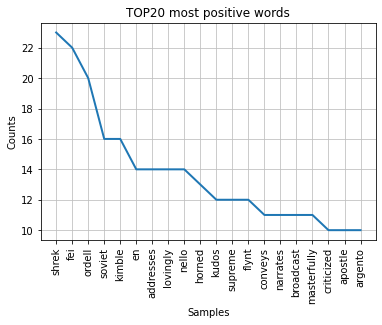

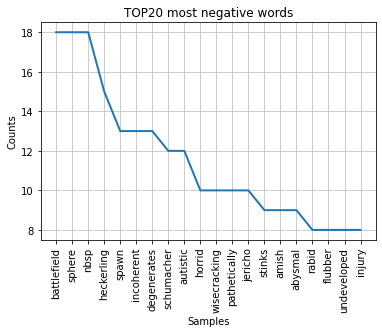

<AxesSubplot:title={'center':'TOP20 most negative words'}, xlabel='Samples', ylabel='Counts'>

In [13]:
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)
common_set = set(positive_fd).intersection(negative_fd)

for word in common_set:
  del positive_fd[word]
  del negative_fd[word]

top_100_pos = {word for word, count in positive_fd.most_common(100)}
top_100_neg = {word for word, count in negative_fd.most_common(100)}

positive_fd.plot(20, title="TOP20 most positive words")
negative_fd.plot(20, title="TOP20 most negative words")

In [14]:
def extract_features(text):
  features = dict()
  wordcount = 0
  compound_scores = list()
  positive_scores = list()
  for sentence in tokenize.sent_tokenize(text):
    for word in tokenize.word_tokenize(sentence):
      if word.lower() in top_100_pos:
        wordcount += 1
    compound_scores.append(sia.polarity_scores(sentence)["compound"])
    positive_scores.append(sia.polarity_scores(sentence)["pos"])

  # Sumar 1 a la punctuacion para homogeneizar en casos posteriores
  features["mean_compound"] = numpy.mean(compound_scores) + 1
  features["mean_positive"] = numpy.mean(positive_scores)
  features["wordcount"] = wordcount
  return features

features = [
            (extract_features(corpus.movie_reviews.raw(review)), "pos")
            for review in corpus.movie_reviews.fileids(categories=["pos"])
]
features.extend([
            (extract_features(corpus.movie_reviews.raw(review)), "neg")
            for review in corpus.movie_reviews.fileids(categories=["neg"])
])

### Entrenamiento de algoritmos

Como ya se ha explicado en otras sesiones, para evaluar la bondad de un
algoritmo, debemos entrenarlo sobre un conjunto de datos diferente del
conjunto sobre el que posteriormente testearemos.

Nosotros entrenaremos con 1/4 parte de los datos y evaluaremos sobre el resto.

En primer lugar, y para comprobar si la inclusión de palabras exclusivas de
un entorno ayuda a la predicción, haremos uso de un modelo Naïve Bayes.

In [15]:
train_count = len(features) // 4
random.shuffle(features)
classifier = nltk.NaiveBayesClassifier.train(features[:train_count])
classifier.show_most_informative_features(10)
print(f'Precision (accuracy): {nltk.classify.accuracy(classifier, features[train_count:]):.2%}')


Most Informative Features
               wordcount = 5                 pos : neg    =      6.0 : 1.0
               wordcount = 2                 pos : neg    =      3.7 : 1.0
               wordcount = 1                 pos : neg    =      1.7 : 1.0
               wordcount = 0                 neg : pos    =      1.7 : 1.0
               wordcount = 4                 pos : neg    =      1.1 : 1.0
Precision (accuracy): 66.60%


Por último, y como curiosidad, vamos a entrenar varios modelos de
aprendizaje automático a partir de estas features que hemos calculado
nosotros manualmente y que antes han demostrado mejorar sobre nuestro
sistema de defecto de NLTK.

In [16]:
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [17]:
train_count = len(features) // 4
random.shuffle(features)
for name, sklearn_class in classifiers.items():
  classifier = nltk.classify.SklearnClassifier(sklearn_class)
  classifier.train(features[:train_count])
  accuracy = nltk.classify.accuracy(classifier, features[train_count:])
  print(f'Precision (accuracy): {accuracy:.2%} - {name}')

Precision (accuracy): 66.93% - BernoulliNB
Precision (accuracy): 66.93% - ComplementNB
Precision (accuracy): 66.93% - MultinomialNB
Precision (accuracy): 66.67% - KNeighborsClassifier
Precision (accuracy): 60.47% - DecisionTreeClassifier
Precision (accuracy): 66.60% - RandomForestClassifier
Precision (accuracy): 72.27% - LogisticRegression
Precision (accuracy): 73.07% - MLPClassifier
Precision (accuracy): 70.00% - AdaBoostClassifier
